## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [17]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [20]:
telecom['TotalCharges']=telecom['TotalCharges'].fillna(0)

In [21]:
telecom.loc[telecom['TotalCharges']==" "] = 0

In [22]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [24]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [25]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.697004,0.162147,2279.734304
std,24.559481,30.171186,0.368612,2266.794470
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.450000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [26]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [27]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [28]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [29]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [32]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.142523,0.350963,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.050845,-0.377957,1,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.435430,1.329866,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.009331,0.776103,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.299832,-0.701925,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


In [36]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [37]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

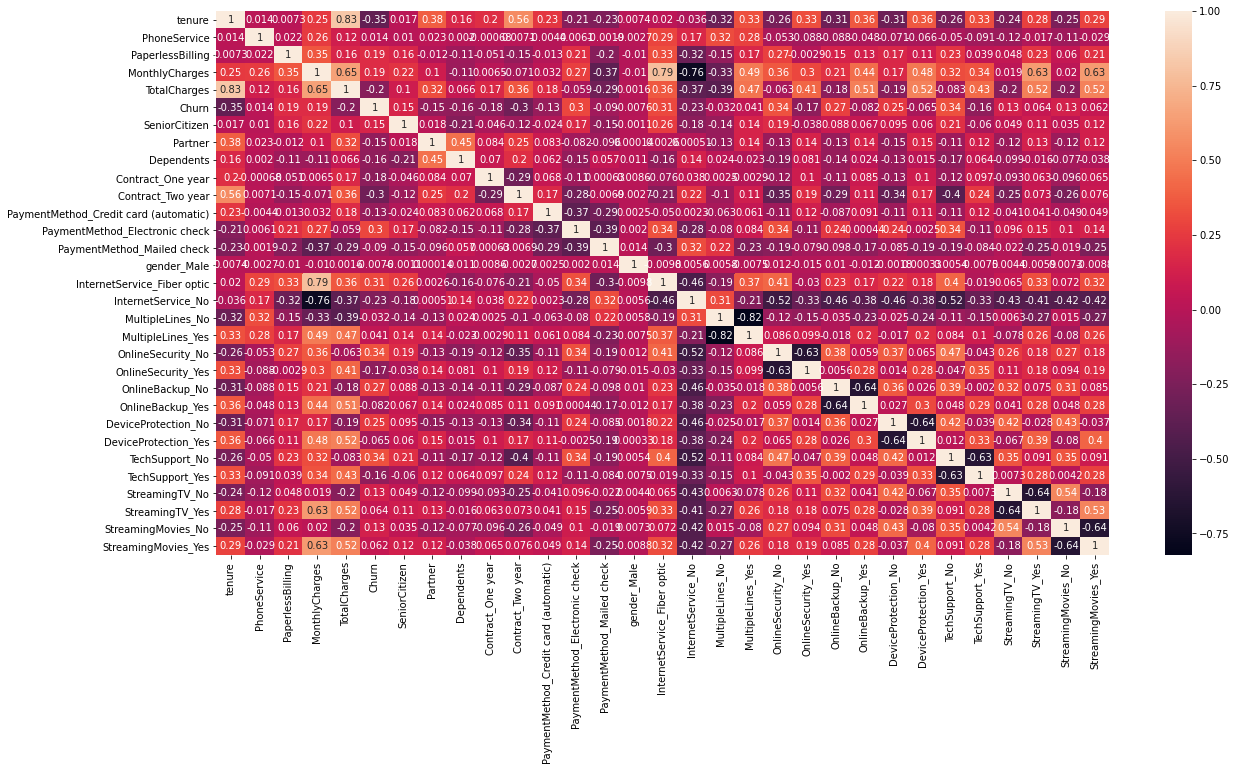

In [38]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [39]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

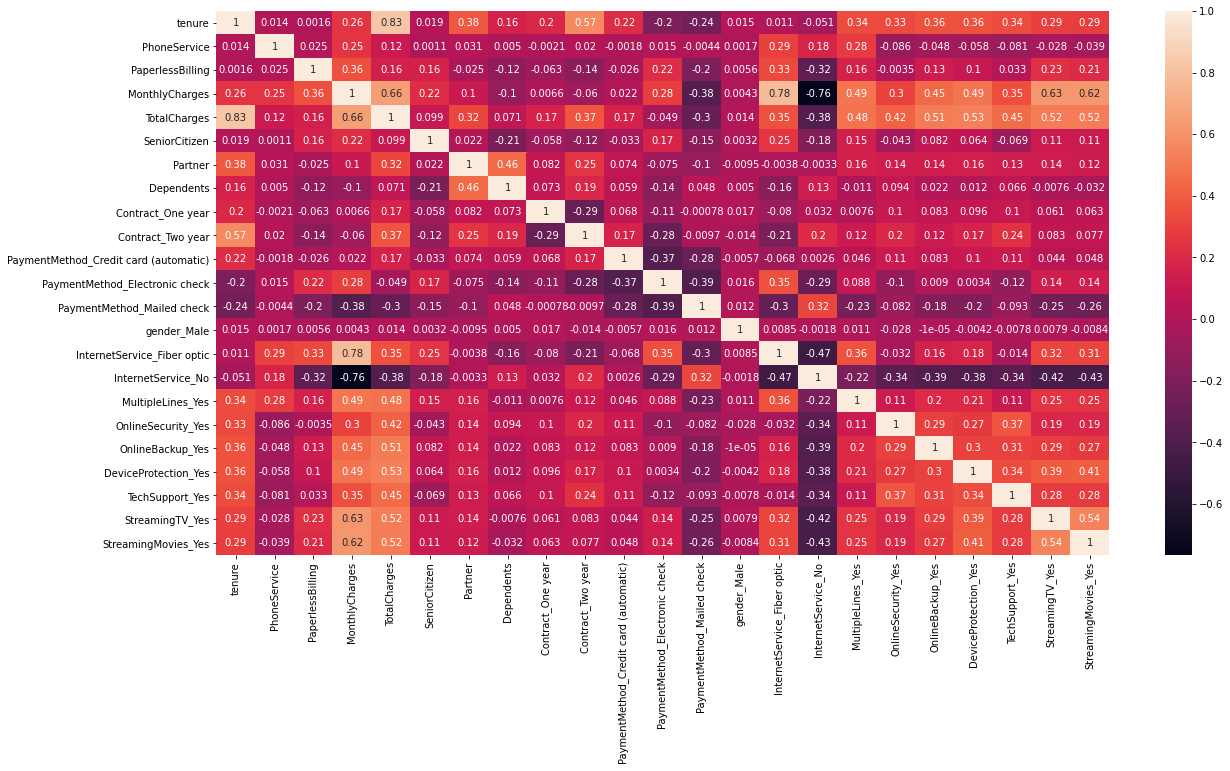

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [41]:
import statsmodels.api as sm

In [42]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.4
Date:                Mon, 27 Sep 2021   Deviance:                       4026.7
Time:                        09:27:17   Pearson chi2:                 5.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6908      0.989      0.698      0.485      -1.248       2.629
tenure                                   -1.2895      0.177     -7.299      0.000      -1.636      -0.943
PhoneService                             -1.4662      0.518     -2.828      0.005      -2.482      -0.450
PaperlessBilling                          0.3629      0.090      4.028      0.000       0.186       0.539
MonthlyCharges                            1.3702      0.716      1.913      0.056      -0.034       2.774
TotalCharges                              0.5408      0.187      2.894      0.004       0.175       0.907
SeniorCitizen                             0.2974      0.103      2.902      0.004       0.097       0.498
Partner                                   0.0393      0.094      0.417      0.676      -0.145       0.224
Dependents                               -0.2159      0.108     -2.006      0.045      -0.427      -0.005
Contract_One year                        -0.6687      0.129     -5.165      0.000      -0.922      -0.415
Contract_Two year                        -1.3057      0.208     -6.275      0.000      -1.714      -0.898
PaymentMethod_Credit card (automatic)    -0.1228      0.138     -0.891      0.373      -0.393       0.147
PaymentMethod_Electronic check            0.3009      0.114      2.641      0.008       0.078       0.524
PaymentMethod_Mailed check               -0.0510      0.138     -0.369      0.712      -0.322       0.220
gender_Male                              -0.0338      0.078     -0.431      0.666      -0.187       0.120
InternetService_Fiber optic              -0.3621      0.603     -0.600      0.548      -1.544       0.820
InternetService_No                        0.2344      0.612      0.383      0.702      -0.965       1.434
MultipleLines_Yes                         0.0759      0.152      0.500      0.617      -0.222       0.374
OnlineSecurity_Yes                       -0.5093      0.158     -3.214      0.001      -0.820      -0.199
OnlineBackup_Yes                         -0.4861      0.152     -3.199      0.001      -0.784      -0.188
DeviceProtection_Yes                     -0.2665      0.153     -1.738      0.082      -0.567       0.034
TechSupport_Yes                          -0.7290      0.160     -4.548      0.000      -1.043      -0.415
StreamingTV_Yes                          -0.2501      0.258     -0.969      0.332      -0.756       0.256
StreamingMovies_Yes                      -0.2808      0.259     -1.086      0.278      -0.788       0.226
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 8),
 ('StreamingMovies_Yes', False, 5)]

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male', 'DeviceProtection_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.4
Date:                Mon, 27 Sep 2021   Deviance:                       4034.9
Time:                        09:27:46   Pearson chi2:                 5.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.5966      0.224     -2.664      0.008      -1.036      -0.158
tenure                            -1.2765      0.172     -7.414      0.000      -1.614      -0.939
PhoneService                      -0.8818      0.180     -4.902      0.000      -1.234      -0.529
PaperlessBilling                   0.3753      0.090      4.184      0.000       0.200       0.551
MonthlyCharges                     0.5223      0.160      3.262      0.001       0.209       0.836
TotalCharges                       0.5116      0.183      2.789      0.005       0.152       0.871
SeniorCitizen                      0.3352      0.101      3.333      0.001       0.138       0.532
Contract_One year                 -0.6978      0.129     -5.412      0.000      -0.951      -0.445
Contract_Two year                 -1.3417      0.207     -6.472      0.000      -1.748      -0.935
PaymentMethod_Electronic check     0.3675      0.083      4.407      0.000       0.204       0.531
InternetService_Fiber optic        0.3492      0.176      1.987      0.047       0.005       0.694
InternetService_No                -0.4494      0.224     -2.004      0.045      -0.889      -0.010
MultipleLines_Yes                  0.2174      0.099      2.196      0.028       0.023       0.411
OnlineSecurity_Yes                -0.3695      0.103     -3.572      0.000      -0.572      -0.167
OnlineBackup_Yes                  -0.3462      0.096     -3.622      0.000      -0.534      -0.159
TechSupport_Yes                   -0.5909      0.109     -5.401      0.000      -0.805      -0.376
==================================================================================================
"""

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

877     0.042587
5792    0.470946
5334    0.095849
878     0.027111
6578    0.124032
3090    0.459733
3043    0.726834
5028    0.043188
4463    0.698653
2822    0.075222
dtype: float64

In [61]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04258652, 0.47094588, 0.09584884, 0.0271111 , 0.12403181,
       0.45973262, 0.72683421, 0.04318754, 0.69865334, 0.07522224])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [62]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.042587,877
1,1,0.470946,5792
2,1,0.095849,5334
3,0,0.027111,878
4,0,0.124032,6578


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [63]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.042587,877,0
1,1,0.470946,5792,0
2,1,0.095849,5334,0
3,0,0.027111,878,0
4,0,0.124032,6578,0


In [64]:
from sklearn import metrics

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3256  371]
 [ 559  744]]


In [66]:
# Predicted     not_churn    churn
# Actual
# not_churn        3256      371
# churn            559       744  

In [67]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8113590263691683


#### Checking VIFs (Variance inflation factor)

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
X_train[col].shape

(4930, 15)

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,11.05
4,TotalCharges,10.32
1,PhoneService,9.16
0,tenure,6.80
9,InternetService_Fiber optic,6.25
10,InternetService_No,6.11
7,Contract_Two year,3.19
2,PaperlessBilling,2.73
11,MultipleLines_Yes,2.59
13,OnlineBackup_Yes,2.09


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [71]:
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [72]:
col = col.drop('MonthlyCharges', 1)
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes'],
      dtype='object')

In [73]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.8
Date:                Mon, 27 Sep 2021   Deviance:                       4045.6
Time:                        09:27:53   Pearson chi2:                 5.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1083      0.162     -6.836      0.000      -1.426      -0.791
tenure                            -1.4114      0.169     -8.348      0.000      -1.743      -1.080
PhoneService                      -0.5849      0.156     -3.754      0.000      -0.890      -0.280
PaperlessBilling                   0.4024      0.089      4.509      0.000       0.227       0.577
TotalCharges                       0.7283      0.173      4.221      0.000       0.390       1.066
SeniorCitizen                      0.3439      0.100      3.432      0.001       0.148       0.540
Contract_One year                 -0.6499      0.128     -5.077      0.000      -0.901      -0.399
Contract_Two year                 -1.3048      0.207     -6.290      0.000      -1.711      -0.898
PaymentMethod_Electronic check     0.3958      0.083      4.784      0.000       0.234       0.558
InternetService_Fiber optic        0.7753      0.119      6.533      0.000       0.543       1.008
InternetService_No                -0.9513      0.163     -5.846      0.000      -1.270      -0.632
MultipleLines_Yes                  0.2985      0.096      3.116      0.002       0.111       0.486
OnlineSecurity_Yes                -0.3067      0.101     -3.024      0.002      -0.505      -0.108
OnlineBackup_Yes                  -0.2745      0.093     -2.959      0.003      -0.456      -0.093
TechSupport_Yes                   -0.4809      0.104     -4.644      0.000      -0.684      -0.278
==================================================================================================
"""

In [74]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
y_train_pred[:10]

array([0.03373334, 0.44242854, 0.09460376, 0.03068123, 0.11374419,
       0.45004565, 0.74551956, 0.04567997, 0.72629616, 0.06840729])

In [76]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.033733,877,0
1,1,0.442429,5792,0
2,1,0.094604,5334,0
3,0,0.030681,878,0
4,0,0.113744,6578,0


In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8123732251521298


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,9.11
3,TotalCharges,7.09
0,tenure,6.33
8,InternetService_Fiber optic,4.08
9,InternetService_No,3.30
6,Contract_Two year,3.17
2,PaperlessBilling,2.67
10,MultipleLines_Yes,2.52
12,OnlineBackup_Yes,2.08
13,TechSupport_Yes,2.05


In [80]:
# Let's drop PhoneService since it has a high VIF
col = col.drop('PhoneService')
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.8
Date:                Mon, 27 Sep 2021   Deviance:                       4059.6
Time:                        09:27:56   Pearson chi2:                 5.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4757      0.131    -11.262      0.000      -1.733      -1.219
tenure                            -1.3145      0.167     -7.850      0.000      -1.643      -0.986
PaperlessBilling                   0.3990      0.089      4.485      0.000       0.225       0.573
TotalCharges                       0.6447      0.172      3.759      0.000       0.309       0.981
SeniorCitizen                      0.3664      0.100      3.666      0.000       0.171       0.562
Contract_One year                 -0.6611      0.128     -5.173      0.000      -0.912      -0.411
Contract_Two year                 -1.3054      0.207     -6.303      0.000      -1.711      -0.899
PaymentMethod_Electronic check     0.4048      0.083      4.902      0.000       0.243       0.567
InternetService_Fiber optic        0.6200      0.110      5.647      0.000       0.405       0.835
InternetService_No                -1.1483      0.153     -7.510      0.000      -1.448      -0.849
MultipleLines_Yes                  0.2398      0.094      2.559      0.010       0.056       0.423
OnlineSecurity_Yes                -0.3260      0.101     -3.223      0.001      -0.524      -0.128
OnlineBackup_Yes                  -0.2651      0.093     -2.863      0.004      -0.447      -0.084
TechSupport_Yes                   -0.4935      0.103     -4.777      0.000      -0.696      -0.291
==================================================================================================
"""

In [82]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [83]:
y_train_pred[:10]

array([0.02362224, 0.44545128, 0.09045044, 0.0361076 , 0.12269555,
       0.49297469, 0.66746649, 0.04583233, 0.73132242, 0.077283  ])

In [84]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.023622,877,0
1,1,0.445451,5792,0
2,1,0.090450,5334,0
3,0,0.036108,878,0
4,0,0.122696,6578,0


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8087221095334686


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.04
0,tenure,6.19
7,InternetService_Fiber optic,3.14
5,Contract_Two year,2.99
1,PaperlessBilling,2.52
8,InternetService_No,2.30
9,MultipleLines_Yes,2.28
11,OnlineBackup_Yes,2.01
12,TechSupport_Yes,1.96
6,PaymentMethod_Electronic check,1.85


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [88]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3268,  359],
       [ 584,  719]], dtype=int64)

In [89]:
# Actual/Predicted     not_churn    churn
        # not_churn        3268     359
        # churn            584      719 

In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8087221095334686

In [91]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

## Metrics beyond simply accuracy

Confusion Matrix <br>
TN FP <br>
FN TP

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# True Positive Rate = True Positives / (True Positives + False Negatives)
# Let's see the sensitivity of our logistic regression model; sensitivity = True Positive Rate
TP / float(TP+FN)

0.5518035303146585

In [94]:
# False Positive Rate = False Positives / (False Positives + True Negatives)
# False Positive Rate = 1 - Specificity
# Specificity = True Negatives / (True Negatives + False Positives)
# Let us calculate specificity; specificity = False Positive Rate
# It tells us how many of the actual negative cases we were able to predict correctly with our model
TN / float(TN+FP)

0.9010201268265784

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09897987317342156


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.6669758812615956


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8483904465212876


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
help(metrics.roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics._ranking:

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores.
    
        * In the binary case, it corresponds to an array 

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

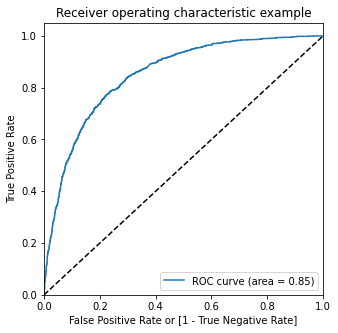

In [101]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.023622,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.445451,5792,0,1,1,1,1,1,0,0,0,0,0
2,1,0.090450,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.036108,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.122696,6578,0,1,1,0,0,0,0,0,0,0,0


In [103]:
cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[0] )
total1=sum(sum(cm1))

In [104]:
y_train_pred_final.shape

(4930, 14)

In [105]:
total1

4930

In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.614402  0.937836  0.498208
0.2   0.2  0.717850  0.861090  0.666391
0.3   0.3  0.768560  0.785111  0.762614
0.4   0.4  0.798986  0.682272  0.840915
0.5   0.5  0.808722  0.551804  0.901020
0.6   0.6  0.798174  0.386800  0.945961
0.7   0.7  0.773834  0.201074  0.979597
0.8   0.8  0.740771  0.024559  0.998070
0.9   0.9  0.735700  0.000000  1.000000


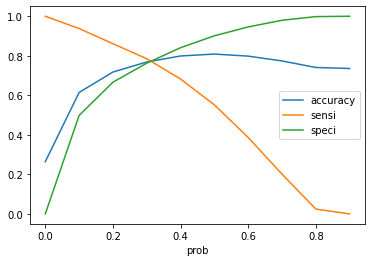

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.023622,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.445451,5792,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.090450,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.036108,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.122696,6578,0,1,1,0,0,0,0,0,0,0,0,0


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7685598377281947

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2766,  861],
       [ 280, 1023]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7851112816577129

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.7626137303556658

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23738626964433415


In [115]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5429936305732485


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9080761654629022


## Precision and Recall

In [117]:
#Looking at the confusion matrix again

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3268,  359],
       [ 584,  719]], dtype=int64)

##### Precision
TP / TP + FP

In [119]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6669758812615956

##### Recall
TP / TP + FN

In [120]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5518035303146585

Using sklearn utilities for the same

In [121]:
from sklearn.metrics import precision_score, recall_score

In [122]:
?precision_score

In [123]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6669758812615956

In [124]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5518035303146585

### Step 11: Making predictions on the test set

In [125]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [126]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
4880,-1.292192,0,-1.008395,0,0,1,0,0,1,0,0,0,0
1541,-1.255751,0,-1.008323,0,0,1,0,0,1,0,0,0,0
1289,-1.270659,0,-1.007801,0,1,0,0,0,0,1,1,1,1
5745,-1.273971,1,-1.008321,0,0,1,0,0,1,1,0,0,0
4873,-1.363419,0,-1.008575,0,0,0,0,0,1,0,0,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [128]:
y_test_pred = res.predict(X_test_sm)

In [129]:
y_test_pred[:10]

4880    0.053102
1541    0.050746
1289    0.123371
5745    0.093975
4873    0.185122
4168    0.101866
1557    0.404839
2892    0.187099
664     0.052341
1588    0.545814
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
# Let's see the head
y_pred_1.head()

,0
4880,0.053102
1541,0.050746
1289,0.123371
5745,0.093975
4873,0.185122


In [133]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
y_pred_final.head()

,Churn,CustID,0
0,0,4880,0.005412
1,0,1541,0.001858
2,0,1289,0.016393
3,0,5745,0.006332
4,0,4873,0.133493


In [120]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [121]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [122]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4880,0,0.005412
1,1541,0,0.001858
2,1289,0,0.016393
3,5745,0,0.006332
4,4873,0,0.133493


In [123]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [124]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4880,0,0.005412,0
1,1541,0,0.001858,0
2,1289,0,0.016393,0
3,5745,0,0.006332,0
4,4873,0,0.133493,0


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7756743965925225

In [126]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1281,  266],
       [ 208,  358]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6325088339222615

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8280542986425339